# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.004
0.003
0.002
0.0
0.004
0.0
0.0
0.003
0.001
0.003
0.003
-0.002
-0.002
-0.002
-0.001
0.001
0.001
0.002
0.002
0.002
0.002
0.0
0.0
0.0
0.0
0.004
0.001
-0.002
-0.004
-0.004
-0.004
0.0
-0.004
0.0
0.988
0.992
0.991
0.992
0.993
1.97
1.967
1.967
1.97
2.962
2.964
2.964
2.963
2.963
3.941
3.941
3.94
3.94
4.936
4.936
4.935
4.935
5.921
5.921
5.923
6.585
6.588
6.592
6.59
6.59
7.259
7.259
7.254
7.254
8.245
8.25
8.251
8.25
8.25
9.232
9.234
9.235
9.234
9.234
10.224
10.226
10.229
10.228
10.228
11.205
11.208
11.208
11.209
11.21
12.195
12.195
12.198
12.197
13.167
13.17
13.173
13.173
13.174
13.886
13.885
13.883
13.885
14.596
14.598
14.599
15.591
15.594
15.594
15.593
16.585
16.587
16.587
16.585
16.585
17.565
17.566
17.565
17.569
17.566
18.562
18.561
18.557
18.557
19.545
19.547
19.551
19.554
19.55
20.54
20.539
20.541
21.045
21.043
21.043
21.536
21.536
21.538
21.537
21.538
22.529
22.53
22.53
22.53
23.515
23.516
23.515
23.513
24.508
24.507
24.505
24.505
25.487
25.488
25.487
25.487
26.475
26.477
26.474
26.4

57.386
57.386
57.386
57.385
57.386
57.386
57.386
57.385
57.384
57.384
57.384
57.384
57.383
57.384
57.385
57.384
57.384
57.385
57.385
57.385
57.385
57.381
57.381
57.383
57.381
57.537
57.604
57.627
57.627
57.644
57.644
57.644
57.644
57.645
57.643
57.642
57.641
57.641
57.641
57.652
57.653
57.653
57.653
57.653
57.657
57.657
57.654
57.653
57.653
57.653
57.653
57.653
57.653
57.652
57.652
57.651
57.653
57.653
57.653
57.654
57.653
57.652
57.651
57.651
57.651
57.65
57.649
57.649
57.649
57.651
57.649
57.649
57.649
57.65
57.65
57.65
57.648
57.647
57.646
57.648
57.85
57.85
57.85
57.85
57.849
57.849
57.849
57.848
57.861
57.86
57.86
57.86
57.86
57.86
57.861
57.861
57.861
57.861
57.861
57.86
57.858
57.858
57.86
57.86
57.86
57.86
57.86
57.86
57.859
57.857
57.859
57.859
57.858
57.858
57.858
57.857
57.857
57.861
57.86
57.857
57.857
57.857
57.857
57.855
57.854
57.853
57.854
57.945
57.963
57.963
57.961
57.961
57.961
57.961
57.96
57.96
57.958
57.958
57.958
57.972
57.972
57.975
57.975
57.972
57.974
57.973
5

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.004
1,2,0.003
2,4,0.002
3,6,0.000
4,8,0.004
...,...,...
1418,2836,59.854
1419,2838,59.856
1420,2840,59.856
1421,2842,59.854


<IPython.core.display.Javascript object>


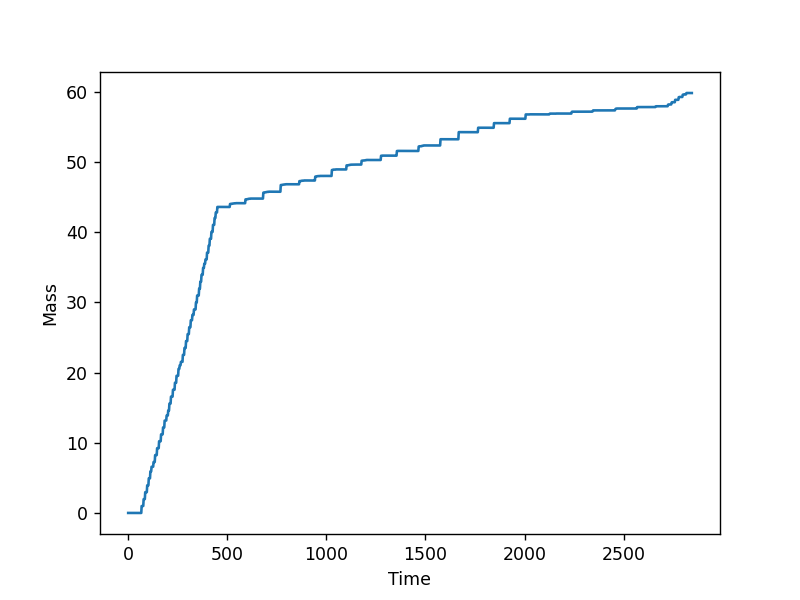

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_240323_S211-216.csv')